<a href="https://colab.research.google.com/github/ZakiKurdya/Predictive-Maintenance/blob/main/modeling_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science CSCI 3320 Final Project** | Predictive Maintenance Dataset ⚙️

---

© Zaki Kurdya

<a href="https://github.com/ZakiKurdya/Predictive-Maintenance">
<img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="github repository" width=35></a>

<a href="https://colab.research.google.com/drive/1DDEsCd9cCICfcxJQJMmKq9yyMYXAl3et?usp=sharing">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/1200px-Google_Colaboratory_SVG_Logo.svg.png" width=65>
</a>

# **Modeling** 🧪

##**Load the cleaned dataset** 🔃

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

df = pd.read_csv('https://raw.githubusercontent.com/ZakiKurdya/Predictive-Maintenance/main/dataset/cleaned_dataset.csv')

In [3]:
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power
0,1.0,-0.947770,-0.944225,0.272686,0.235748,-1.703463,0.0,0.626122
1,0.0,-0.897715,-0.876822,-0.838095,0.631532,-1.656112,0.0,0.494763
2,0.0,-0.947770,-1.011628,-0.139002,0.982082,-1.624544,0.0,1.465392


In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
  accuracy = accuracy_score(y_test, y_predictions)
  precision = precision_score(y_test, y_predictions, average='weighted')
  recall = recall_score(y_test, y_predictions, average='weighted')
  precision = precision_score(y_test, y_predictions, average='weighted')
  f1 = f1_score(y_test, y_predictions, average='weighted')

  # save the scores in model_performance dataframe
  model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling** 🧮

In [17]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

Split the dataset (70% train : 30% test)

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

In [19]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

(array([6406.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

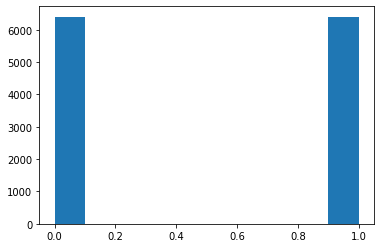

In [20]:
plt.hist(y_train)

## **Decision Tree Model**

Build the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:
0. No failure
1. Machine failure

In [28]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2746
         1.0       0.24      0.61      0.35        74

    accuracy                           0.94      2820
   macro avg       0.62      0.78      0.66      2820
weighted avg       0.97      0.94      0.95      2820



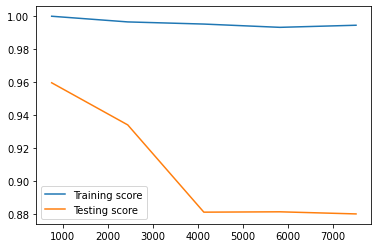

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


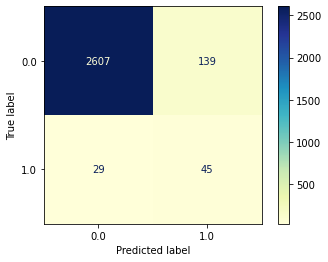

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.YlGnBu)  
plt.show()

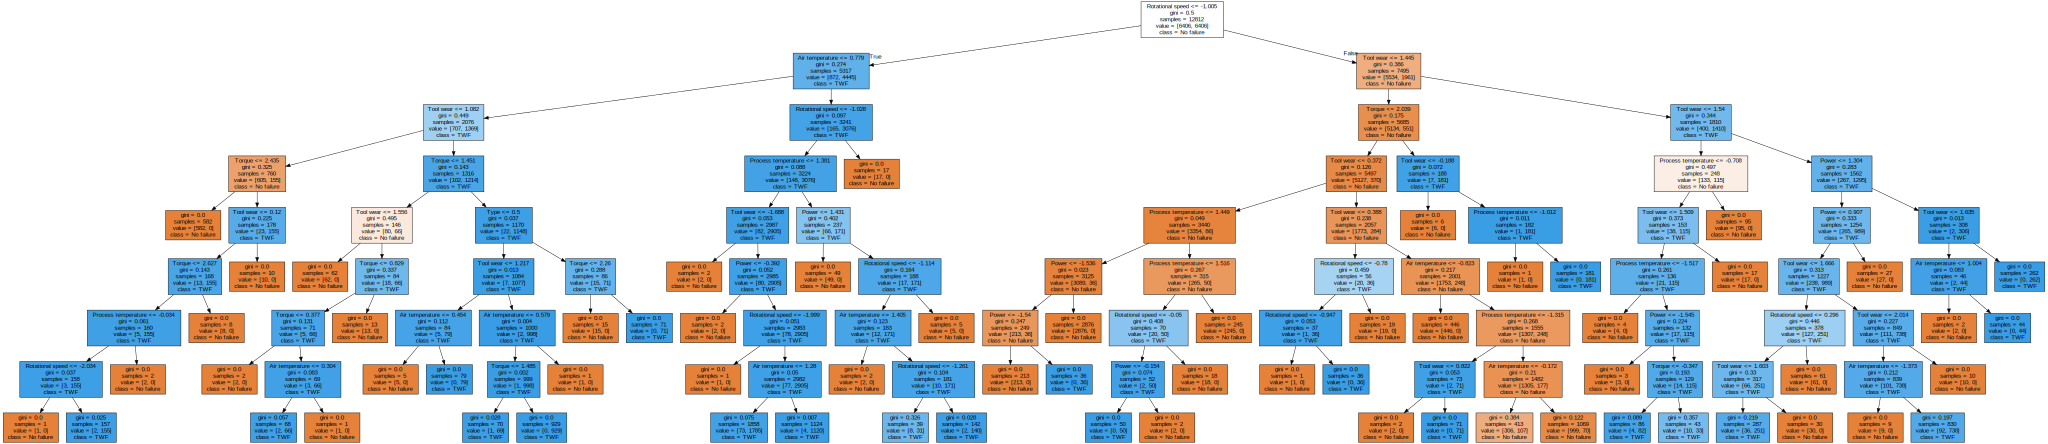

In [31]:
import graphviz
from sklearn import tree

data = tree.export_graphviz(model,
                            feature_names=X.columns,  
                            class_names=['No failure','TWF','HDF','PWF','OSF','RNF'],
                            filled=True)

# draw graph
graph = graphviz.Source(data, format="png") 
graph.render('nodes', format='png', view=False)
graph

In [32]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_3 <= -1.01
|   |--- feature_1 <= 0.78
|   |   |--- feature_5 <= 1.08
|   |   |   |--- feature_4 <= 2.44
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  2.44
|   |   |   |   |--- feature_5 <= 0.12
|   |   |   |   |   |--- feature_4 <= 2.63
|   |   |   |   |   |   |--- feature_2 <= -0.03
|   |   |   |   |   |   |   |--- feature_3 <= -2.03
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_3 >  -2.03
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  -0.03
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_4 >  2.63
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  0.12
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_5 >  1.08
|   |   |   |--- feature_4 <= 1.45
|   |   |   |   |--- feature_5 <= 1.56
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  1.56
|   |   |   |   |   |--- feature_4 <= 0.83
|   |   |   |

In [34]:
# save the model
pickle.dump(model, open('decision_tree_model.pkl', 'wb'))

## **k-NN (K-nearest neighbors) Model**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


Build the model

In [36]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:
0. No failure
1. Machine failure

In [37]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2746
         1.0       0.50      0.36      0.42        74

    accuracy                           0.97      2820
   macro avg       0.74      0.68      0.70      2820
weighted avg       0.97      0.97      0.97      2820



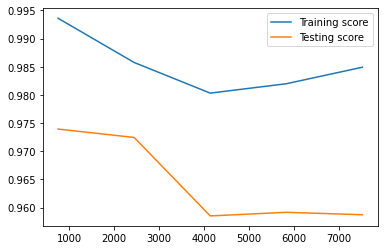

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of k-NN model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


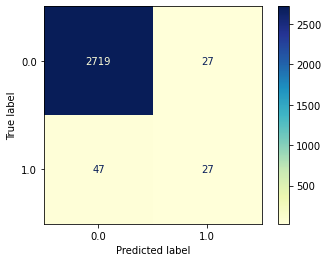

In [39]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.YlGnBu)  
plt.show()

In [40]:
# save the model
pickle.dump(model, open('k-NN_model.pkl', 'wb'))

## **Random Forest Model**

Build the model

In [53]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:
0. No failure
1. Machine failure


In [54]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2746
         1.0       0.76      0.53      0.62        74

    accuracy                           0.98      2820
   macro avg       0.88      0.76      0.81      2820
weighted avg       0.98      0.98      0.98      2820



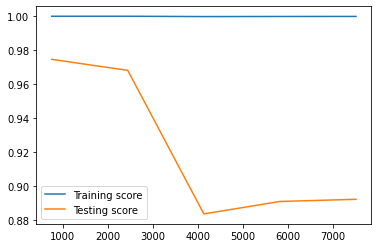

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Random Forest model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


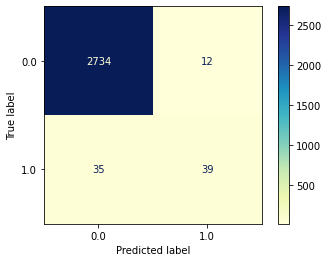

In [56]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.YlGnBu)  
plt.show()

In [57]:
# save the model
pickle.dump(model, open('random_forest_model.pkl', 'wb'))

## **Gradient Boosting Model**

Build the model

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation for each Machine failure class:
0. No failure
1. Machine failure

In [43]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2746
         1.0       0.27      0.81      0.41        74

    accuracy                           0.94      2820
   macro avg       0.63      0.88      0.69      2820
weighted avg       0.98      0.94      0.95      2820



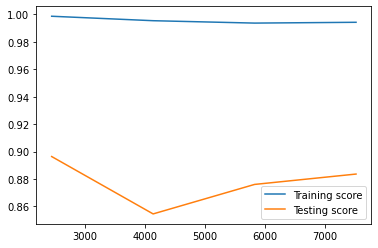

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gradient Boosting model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


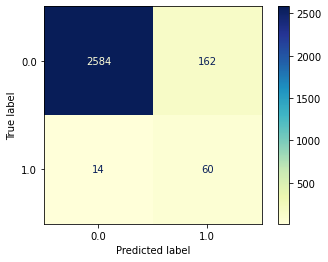

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.YlGnBu)  
plt.show()

In [46]:
# save the model
pickle.dump(model, open('gradient_boosting_model.pkl', 'wb'))

## **Gaussian Naive Bayes Model**

Build the model

In [47]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation for each Machine failure class:
0. No failure
1. Machine failure

In [48]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      2746
         1.0       0.09      0.92      0.17        74

    accuracy                           0.76      2820
   macro avg       0.54      0.84      0.51      2820
weighted avg       0.97      0.76      0.84      2820



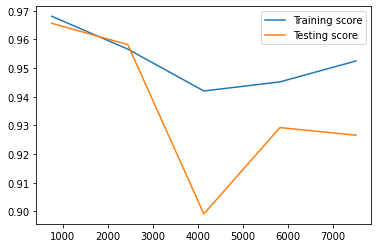

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gaussian Naive Bayes model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


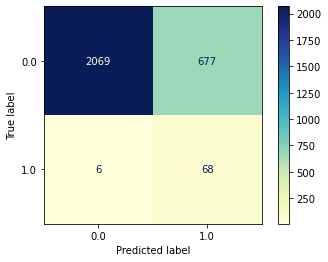

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.YlGnBu)  
plt.show()

In [51]:
# save the model
pickle.dump(model, open('gaussian_naive_bayes_model.pkl', 'wb'))

# **Evaluation** 🎲

In [58]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.940426,0.969464,0.940426,0.952517,0.035973,0.001970
k-NN,0.973759,0.970333,0.973759,0.971756,0.019095,0.097630
Gradient Boosting,0.937589,0.975604,0.937589,0.952327,1.846579,0.008281
Gaussian Naive Bayes,0.757801,0.973338,0.757801,0.840162,0.049285,0.003402
Random Forest,0.983333,0.981517,0.983333,0.981835,1.021288,0.060862
